In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from tensorflow.keras import layers,optimizers,datasets#优化器，数据集

model=keras.Sequential()#创建网络序列
#添加第一层卷积层和池化层
model.add(keras.layers.Conv2D(filters=32,kernel_size=5,strides=(1,1),
                             padding='same',activation=tf.nn.relu,input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))
#添加第二层卷积层和池化层
model.add(keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),
                             padding='same',activation=tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))
#添加dropout层以减少过拟合
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
#添加两层全连接层
model.add(keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=10,activation=tf.nn.softmax))


In [2]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()
print(y_train_raw[0])
print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape, y_test_raw.shape)
#将分类标签变为 onehot 编码
num_classes = 10
y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)
print(y_train[0])

x_train=x_train_raw.reshape(60000,784)
x_test=x_test_raw.reshape(10000,784)
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

11493376/11490434 [==============================] - 1s 0us/step
5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


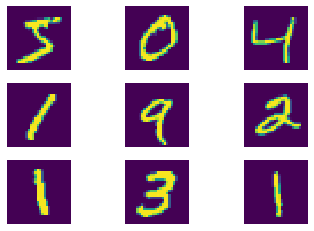

In [18]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])
    #plt.ylable(y[i].numpy())
    plt.axis('off')
plt.show()

In [19]:
#将数据扩充维度，以适应cnn模型
X_train=x_train.reshape(60000,28,28,1)
X_test=x_test.reshape(10000,28,28,1)
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
model.fit(x=X_train,y=y_train,epochs=10,batch_size=128)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 33s 550us/sample - loss: 0.0462 - acc: 0.9855
Epoch 2/10
60000/60000 [==============================] - 32s 534us/sample - loss: 0.0390 - acc: 0.9880
Epoch 3/10
60000/60000 [==============================] - 32s 541us/sample - loss: 0.0361 - acc: 0.9886
Epoch 4/10
60000/60000 [==============================] - 33s 542us/sample - loss: 0.0319 - acc: 0.9905
Epoch 5/10
60000/60000 [==============================] - 31s 524us/sample - loss: 0.0292 - acc: 0.9906
Epoch 6/10
60000/60000 [==============================] - 32s 527us/sample - loss: 0.0259 - acc: 0.9917
Epoch 7/10
60000/60000 [==============================] - 31s 523us/sample - loss: 0.0239 - acc: 0.9922
Epoch 8/10
60000/60000 [==============================] - 31s 525us/sample - loss: 0.0237 - acc: 0.9929
Epoch 9/10
60000/60000 [==============================] - 32s 538us/sample - loss: 0.0215 - acc: 0.9933
Epoch 10/10
60000/60000 [================

In [20]:
#输出最终准确率结果
test_loss,test_acc=model.evaluate(x=X_test,y=y_test)
print("Test Accuracy %.2f"%test_acc)

10000/10000 [==============================] - 3s 278us/sample - loss: 0.0205 - acc: 0.9945
Test Accuracy 0.99


In [14]:
logdir='./mnist_model'
if not os.path.exists(logdir):
    os.mkdir(logdir)
model.save(logdir+'/final_CNN_model.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

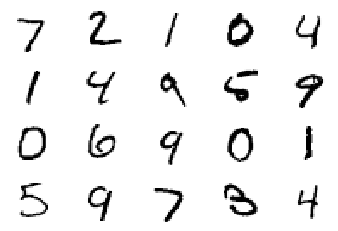

In [21]:
#预测结果可视化
#加载CNN保存模型
from tensorflow.keras.models import load_model
new_model=load_model('./mnist_model/final_CNN_model.h5')
new_model.summary()
#可视化：
import matplotlib.pyplot as plt
%matplotlib inline
def res_Visual(n):
    final_opt_a=new_model.predict_classes(X_test[0:n])#通过模型预测测试集
    fig,ax=plt.subplots(nrows=int(n/5),ncols=5)
    ax=ax.flatten()
    print('前{}张图片预测结果为：'.format(n))
    for i in range(n):
        print(final_opt_a[i],end=',')
        if int((i+1)%5)==0:
            print('/t')
        #图片可视化展示
        img=X_test[i].reshape((28,28))#读取每行数据，格式为Ndarry
        plt.axis("off")
        ax[i].imshow(img,cmap='Greys',interpolation='nearest')#可视化
        ax[i].axis("off")
    print('测试集前{}张图片为：'.format(n))
res_Visual(20)
